# **Scikit-learn - PCA (Principal Component Analysis)**

## Objectives

* Understand what PCA (Principal Component Analysis) is and how it can be used in a project



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [ ]:
import os
current_dir = os.getcwd()
current_dir

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [ ]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

Confirm the new current directory

In [ ]:
current_dir = os.getcwd()
current_dir

## PCA (Principal Component Analysis)

Import Libararies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

Principal Component Analysis, or PCA, is a transformation of your data and attempts to find out what features explain the most variance in your data.

* It reduces the number of variables while preserving as much information as possible. Therefore, it is also referred to as "dimensionality reduction".
* After the transformation, it creates a set of components, where each component contains the relevant information from the original variables.
* Each component explains a certain part of the variance of the whole dataset and is independent (uncorrelated) from each other.
* The drawback of PCA is that it is not easy to understand what each of these components represents since they don't relate one-to-one to a specific variable. Instead, each component corresponds to a combination of the original variable.

### Why and when should we consider using PCA?

* If our data has a lot of variables (or dimensions).

We want to be able to visualise our data to discover patterns. However, it is unfeasible to visualise all of our data in a single plot. We can use PCA to reduce our dataset to 2 or 3 components and visualise it.

In predictive modelling, we are concerned about which variables are more relevant for modelling. PCA is a tool capable of transforming your data, retaining only the most appropriate information or the most variance while keeping all the original variables that help the model learn the patterns in the data.

* In supervised learning, PCA can be used as a step when extracting features for our ML model. Instead of using, for example, SelectFromModel(). You may also use PCA to transform your features into relevant components that can help to predict your target variable.
* In addition, in unsupervised learning, you can use PCA as a step to reduce dimensionality. So your cluster algorithm will be able to understand better how to group similar data.

In [ ]:
#import PCA
from sklearn.decomposition import PCA

### Load Data

Let's load the breast cancer data from sklearn and apply PCA

* It shows records for a breast mass sample and a diagnosis informing whether it is a malignant or benign cancer, where 0 is malignant 1 is benign.
* The target variable is 'diagnostic', and features are the remaining variables.

We know in advance this dataset has only numerical features and no missing data.

* We are adding on purpose missing data (np.NaN) in the first 10 rows of 'mean smoothness' using .iloc[:10,4], just to simulate better real datasets. 

In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()
df_clf = pd.DataFrame(data.data,columns=data.feature_names)
df_clf['diagnostic'] = pd.Series(data.target)
df_clf = df_clf.sample(frac=0.6, random_state=101)
df_clf.iloc[:10,4] = np.NaN

print(df_clf.shape)
df_clf.head()

(341, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnostic
107,12.36,18.54,79.01,466.7,NaN,0.06815,0.02643,0.01921,0.1602,0.06066,...,27.49,85.56,544.1,0.11840,0.19630,0.19370,0.08442,0.2983,0.07185,1
437,14.04,15.98,89.78,611.2,NaN,0.05895,0.03534,0.02944,0.1714,0.05898,...,21.58,101.20,750.0,0.11950,0.12520,0.11170,0.07453,0.2725,0.07234,1
195,12.91,16.33,82.53,516.4,NaN,0.05366,0.03873,0.02377,0.1829,0.05667,...,22.00,90.81,600.6,0.10970,0.15060,0.17640,0.08235,0.3024,0.06949,1
141,16.11,18.05,105.10,813.0,NaN,0.11370,0.09447,0.05943,0.1861,0.06248,...,25.27,129.00,1233.0,0.13140,0.22360,0.28020,0.12160,0.2792,0.08158,0
319,12.43,17.00,78.60,477.3,NaN,0.03454,0.01342,0.01699,0.1472,0.05561,...,20.21,81.76,515.9,0.08409,0.04712,0.02237,0.02832,0.1901,0.05932,1


We are interested in applying PCA to the features only (not the diagnostic)

* We create 2 distinct DataFrames, X, which is the features, and df_target, which contains the diagnostic (benign or malignant).
    * Note, there are 30 features in X.
    * We will use X to apply PCA and df_target at a later stage when we visualise the data.

In [3]:
df_target = df_clf[['diagnostic']]
X = df_clf.drop(['diagnostic'], axis=1)
print(X.shape)
X.head(3)

(341, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
107,12.36,18.54,79.01,466.7,NaN,0.06815,0.02643,0.01921,0.1602,0.06066,...,13.29,27.49,85.56,544.1,0.1184,0.1963,0.1937,0.08442,0.2983,0.07185
437,14.04,15.98,89.78,611.2,NaN,0.05895,0.03534,0.02944,0.1714,0.05898,...,15.66,21.58,101.20,750.0,0.1195,0.1252,0.1117,0.07453,0.2725,0.07234
195,12.91,16.33,82.53,516.4,NaN,0.05366,0.03873,0.02377,0.1829,0.05667,...,13.88,22.00,90.81,600.6,0.1097,0.1506,0.1764,0.08235,0.3024,0.06949


### Create pipeline steps

To apply PCA, we should scale the data. Therefore we create our pipeline that is responsible for data cleaning, feature engineering and feature scaling.

In our case, it will perform data cleaning (median imputation) and feature scaling.

In [4]:
from sklearn.pipeline import Pipeline
### Data Cleaning
from feature_engine.imputation import MeanMedianImputer
### Feat Scaling
from sklearn.preprocessing import StandardScaler


def PipelineDataCleaningFeatEngFeatScaling():
  pipeline_base = Pipeline([
                            
      ( 'MeanMedianImputer', MeanMedianImputer(imputation_method='median') ),

      ( 'feature_scaling', StandardScaler() ),
  ])

  return pipeline_base

PipelineDataCleaningFeatEngFeatScaling()

Pipeline(steps=[('MeanMedianImputer', MeanMedianImputer()),
                ('feature_scaling', StandardScaler())])

We fit and transform the data to the pipeline.

* The result is a NumPy array. Note there are still the same quantity of rows and columns (341, 30). The point to note is that the data type is now an array due to the feature scaling transformation.

In [5]:
pipeline_pca = PipelineDataCleaningFeatEngFeatScaling()
df_pca = pipeline_pca.fit_transform(X)
print(df_pca.shape,'\n', type(df_pca))

(341, 30) 
 <class 'numpy.ndarray'>


In [7]:
#check pca array
df_pca

array([[-0.56738473, -0.16536585, -0.59933184, ..., -0.50820136,
         0.1792575 , -0.63049085],
       [-0.07141397, -0.77390549, -0.13893309, ..., -0.66545513,
        -0.27508597, -0.60317217],
       [-0.40501335, -0.69070671, -0.44885797, ..., -0.54111494,
         0.25145937, -0.76206648],
       ...,
       [ 2.35825232,  0.10324735,  2.55506217, ...,  2.77647856,
         2.06707222,  0.82130135],
       [-0.88031867, -0.24856463, -0.81649299, ...,  0.08615112,
         0.75158939,  2.59478483],
       [ 0.34779941, -1.74614265,  0.40482476, ...,  1.0544782 ,
         0.58957544,  0.99469128]])

### PCA transformation

Now that the data is scaled, we can apply the PCA component.

* We are not assembling PCA to a pipeline at this point, we will do that at a later stage. 
* A quick recap: PCA reduces the number of variables while it preserves as much information as possible. After the transformation, it creates a set of components, where each component contains the relevant information from the original variables.

* How many components should I consider? That depends; let's test setting the number of components as the number of columns the scaled data has, in this case, 30. That is useful in understanding the explained variance of each component.

In [8]:
import numpy as np
from sklearn.decomposition import PCA # import PCA from sklearn

n_components = 30 # set the number of components as all columns in the data

pca = PCA(n_components=n_components).fit(df_pca)  # set PCA object and fit to the data
x_PCA = pca.transform(df_pca) # array with transformed PCA


# the PCA object has .explained_variance_ratio_ attribute, which tells 
# how much information (variance) each component has 
# We store that to a DataFrame relating each component to its variance explanation
ComponentsList = ["Component " + str(number) for number in range(n_components)]
dfExplVarRatio = pd.DataFrame(
    data= np.round(100 * pca.explained_variance_ratio_ ,2),
    index=ComponentsList,
    columns=['Explained Variance Ratio (%)'])

# prints how much of the dataset these components explain (naturally, in this case, will be 100%)
PercentageOfDataExplained = dfExplVarRatio['Explained Variance Ratio (%)'].sum()

print(f"* The {n_components} components explain {round(PercentageOfDataExplained,2)}% of the data \n")
print(dfExplVarRatio)

* The 30 components explain 100.0% of the data 

              Explained Variance Ratio (%)
Component 0                          43.68
Component 1                          18.48
Component 2                          10.31
Component 3                           6.72
Component 4                           5.88
Component 5                           3.86
Component 6                           2.44
Component 7                           1.63
Component 8                           1.31
Component 9                           1.05
Component 10                          0.96
Component 11                          0.84
Component 12                          0.73
Component 13                          0.42
Component 14                          0.34
Component 15                          0.26
Component 16                          0.23
Component 17                          0.22
Component 18                          0.14
Component 19                          0.11
Component 20                          0.09
Compo

Now using the code from  above with changed n_components to 7.

* With 7 components, we achieved a bit more than 91% of data variance.

In [9]:
n_components = 7

pca = PCA(n_components=n_components).fit(df_pca)
x_PCA = pca.transform(df_pca) # array with transformed PCA

ComponentsList = ["Component " + str(number) for number in range(n_components)]
dfExplVarRatio = pd.DataFrame(
    data= np.round(100 * pca.explained_variance_ratio_ ,2),
    index=ComponentsList,
    columns=['Explained Variance Ratio (%)'])

PercentageOfDataExplained = dfExplVarRatio['Explained Variance Ratio (%)'].sum()

print(f"* The {n_components} components explain {round(PercentageOfDataExplained,2)}% of the data \n")
print(dfExplVarRatio)

* The 7 components explain 91.37% of the data 

             Explained Variance Ratio (%)
Component 0                         43.68
Component 1                         18.48
Component 2                         10.31
Component 3                          6.72
Component 4                          5.88
Component 5                          3.86
Component 6                          2.44


Note that the data is transformed and stored at x_PCA. Let's check its content.

* We will notice it is a NumPy array, and its dimension is 341 x 7, where the rows indicate the number of rows and seven relates to the number of components we defined earlier.
* Imagine now that this data would be fed to a model. For this particular dataset, the ML task would be a classification.
* Also, note that the PCA helped reduce from thirty features to seven components where these seven components contain 90% of the information.

In [10]:
print(x_PCA.shape)
x_PCA

(341, 7)


array([[-3.19632096, -0.7882415 , -1.54280305, ...,  0.31482589,
         0.25021347,  0.14958942],
       [-2.15148256, -0.97430915,  0.45730527, ..., -0.43744131,
        -0.18081375, -0.0783528 ],
       [-2.81567468, -0.67506773, -0.47638179, ..., -0.0187848 ,
         0.84195774, -0.40380846],
       ...,
       [13.25075397,  0.68891084,  0.36451787, ..., -1.0003148 ,
         0.78704341,  0.10109186],
       [ 1.2548625 ,  4.93892792, -1.0380955 , ...,  1.71789741,
         1.0133776 ,  1.24697795],
       [ 2.83513614,  1.09372726, -2.33467669, ..., -0.15095285,
        -0.77420664, -0.15741655]])

### Visualise data after PCA transformation

If we want to visualise data before and after applying PCA.

* When faced with the task of visualizing thirty features, the complexity of the data becomes apparent. A correlation analysis can help identify features that are correlated among themselves or, in this dataset, features that are correlated to the target.
* So, let's suppose we want to visualise the relationship between "mean concavity" and "mean concave points" and the target. Since the features are numerical, you can do a scatter plot with them and colour by the target.
    * You will imagine/visualise the frontier between the blue and orange dots. Although that is good, the malignant and benign may look to be separable. At the same time, few data points look mingled in this frontier.
    * However, what about the remaining variables? When you consider this dataset as a whole, is that informative enough to separate these classes?

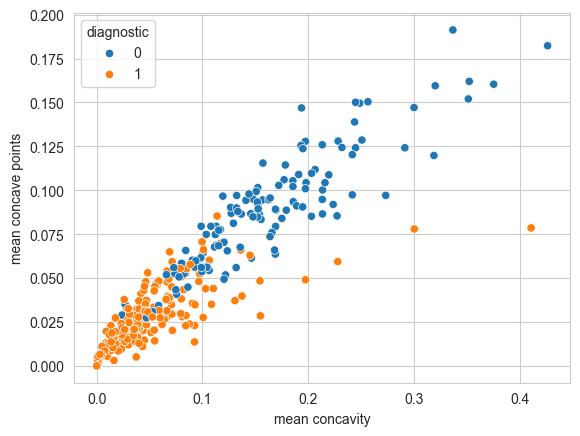

In [11]:
var1, var2 = 'mean concavity' , 'mean concave points'
sns.scatterplot(x=X[var1], y=X[var2], hue=df_target['diagnostic'])
plt.xlabel(var1)
plt.ylabel(var2)
plt.show()

We can plot the PCA components to evaluate, from another perspective, how the data behaves.

* We know x_PCA holds the data after transformation and has seven components. We will plot in a scatterplot the most representative components: components 0 and 1.

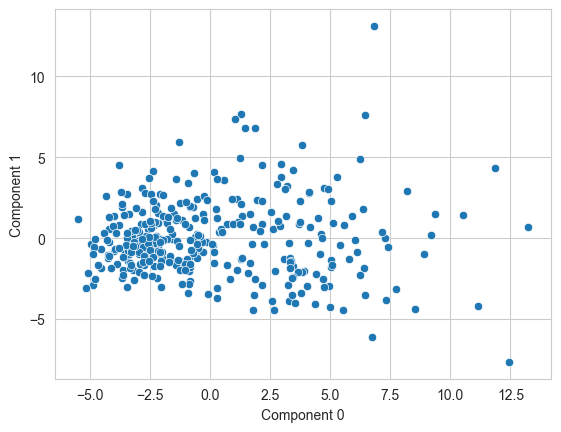

In [12]:
sns.scatterplot(x=x_PCA[:,0], y=x_PCA[:,1])
plt.xlabel('Component 0')
plt.ylabel('Component 1')
plt.show()

We know that these two components hold by themselves 62% of the information (data variance).

* The power of this approach lies in the fact that with just two variables (two components), we gain a clearer understanding of the dataset, providing us with sufficient information to distinguish between malignant and benign cases.
* We enhance the plot's clarity by using df_target as the hue argument to colour the plot according to the diagnostic categories.
    * Note we see a clearer border between 0 and 1.
    * In a nutshell, we have the same data, showing the same information. The difference now is that the data was reduced to its major components.
    * The drawback is that we lose the interpretation since component 0 is made of a combination of the original variables.

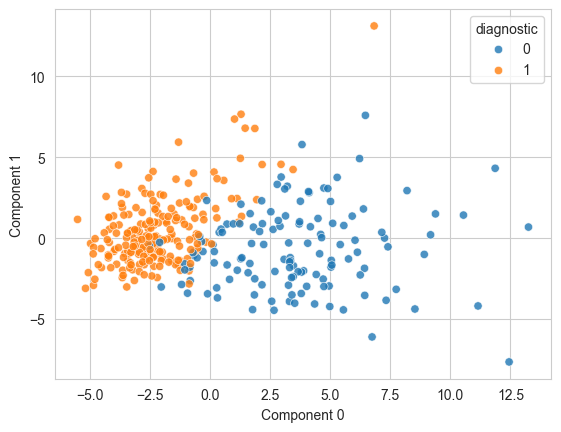

In [13]:
sns.scatterplot(x=x_PCA[:,0], y=x_PCA[:,1], hue=df_target['diagnostic'], alpha=0.8)
plt.xlabel('Component 0')
plt.ylabel('Component 1')
plt.show()

Naturally, we can plot more components. In this exercise, we can plot three components in a 3D scatter plot using Plotly Express
  * Move around the 3D plot and try to visualise if you could draw a surface that would separate the dots. The surface you imagined is an ML model.
  * It's worth noting again that these three components, when plotted, alone hold a significant 72% of all information from the dataset. This is a powerful tool for diagnosing malignant or benign conditions, demonstrating the real-world relevance of our exercise.

In [14]:
import plotly.express as px
fig = px.scatter_3d(x=x_PCA[:,0], y=x_PCA[:,1], z= x_PCA[:,2] , color=df_target['diagnostic'],
                    labels=dict(x="Component 0", y="Component 1", z='Component 2'),
                    color_continuous_scale='spectral',
                    width=750, height=500)
fig.update_traces(marker_size=5)
fig.show()